In [2]:
import pandas as pd


data = pd.read_csv('urinalysis_tests.csv')


data.head(), data.dtypes


(   Unnamed: 0   Age  Gender         Color   Transparency   Glucose   Protein  \
 0           0  76.0  FEMALE  LIGHT YELLOW          CLEAR  NEGATIVE  NEGATIVE   
 1           1   9.0    MALE   DARK YELLOW  SLIGHTLY HAZY  NEGATIVE        1+   
 2           2  12.0    MALE  LIGHT YELLOW  SLIGHTLY HAZY  NEGATIVE     TRACE   
 3           3  77.0    MALE         BROWN         CLOUDY  NEGATIVE        1+   
 4           4  29.0  FEMALE        YELLOW           HAZY  NEGATIVE     TRACE   
 
     pH  Specific Gravity  WBC     RBC Epithelial Cells Mucous Threads  \
 0  5.0             1.010  1-3     0-2       OCCASIONAL           RARE   
 1  5.0             1.030  1-3     0-2             RARE            FEW   
 2  5.0             1.030  0-3     0-2             RARE            FEW   
 3  6.0             1.020  5-8  LOADED             RARE           RARE   
 4  6.0             1.025  1-4     0-2             RARE           RARE   
 
   Amorphous Urates    Bacteria Diagnosis  
 0        NONE SEEN  O

In [10]:
pip install seaborn

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -------------- ------------------------ 61.4/162.8 kB 1.7 MB/s eta 0:00:01
     --------------------------------- ---- 143.4/162.8 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 6.4 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.7 MB 5.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/7.7 MB 4.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.7 MB 3.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/7.7 MB 3.3 MB/s eta 0:00:03
   

In [3]:
# Convert problematic columns to string type explicitly with the correct formatting
data['WBC'] = data['WBC'].astype(str).apply(lambda x: x.replace('-', '-'))
data['RBC'] = data['RBC'].astype(str).apply(lambda x: x.replace('-', '-'))

# Correct specific known issues from date misinterpretation by replacing month abbreviations
date_correction_map = {
    'Jan': '1', 'Feb': '2', 'Mar': '3', 'Apr': '4', 'May': '5', 'Jun': '6',
    'Jul': '7', 'Aug': '8', 'Sep': '9', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

for key, value in date_correction_map.items():
    data['WBC'] = data['WBC'].str.replace(key, value, regex=False)
    data['RBC'] = data['RBC'].str.replace(key, value, regex=False)

# Save the corrected data to a new CSV file
corrected_file_path = 'urinalysis_tests_corrected.csv'
data.to_csv(corrected_file_path, index=False)

corrected_file_path


'urinalysis_tests_corrected.csv'

In [5]:
data_corrected = pd.read_csv('urinalysis_tests_corrected.csv')


data_corrected.head(), data_corrected.dtypes

(   Unnamed: 0   Age  Gender         Color   Transparency   Glucose   Protein  \
 0           0  76.0  FEMALE  LIGHT YELLOW          CLEAR  NEGATIVE  NEGATIVE   
 1           1   9.0    MALE   DARK YELLOW  SLIGHTLY HAZY  NEGATIVE        1+   
 2           2  12.0    MALE  LIGHT YELLOW  SLIGHTLY HAZY  NEGATIVE     TRACE   
 3           3  77.0    MALE         BROWN         CLOUDY  NEGATIVE        1+   
 4           4  29.0  FEMALE        YELLOW           HAZY  NEGATIVE     TRACE   
 
     pH  Specific Gravity  WBC     RBC Epithelial Cells Mucous Threads  \
 0  5.0             1.010  1-3     0-2       OCCASIONAL           RARE   
 1  5.0             1.030  1-3     0-2             RARE            FEW   
 2  5.0             1.030  0-3     0-2             RARE            FEW   
 3  6.0             1.020  5-8  LOADED             RARE           RARE   
 4  6.0             1.025  1-4     0-2             RARE           RARE   
 
   Amorphous Urates    Bacteria Diagnosis  
 0        NONE SEEN  O

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()
for col in data_corrected.columns:
    if data_corrected[col].dtype == 'object':
        data_corrected[col] = le.fit_transform(data_corrected[col])

# Prepare data for modeling
X = data_corrected.drop(['Diagnosis', 'Unnamed: 0'], axis=1)  # Features
y = data_corrected['Diagnosis']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and fit the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handling imbalance by adjusting class weight
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

report, feature_importances


C:\Users\gargi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gargi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gargi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

('              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       407\n           1       0.00      0.00      0.00        24\n\n    accuracy                           0.94       431\n   macro avg       0.47      0.50      0.49       431\nweighted avg       0.89      0.94      0.92       431\n',
 Bacteria            0.184448
 WBC                 0.170925
 Age                 0.115727
 Transparency        0.084315
 RBC                 0.068642
 Specific Gravity    0.064073
 Epithelial Cells    0.055385
 Mucous Threads      0.053972
 Color               0.051866
 pH                  0.040760
 Protein             0.039715
 Gender              0.035875
 Amorphous Urates    0.027448
 Glucose             0.006847
 dtype: float64)

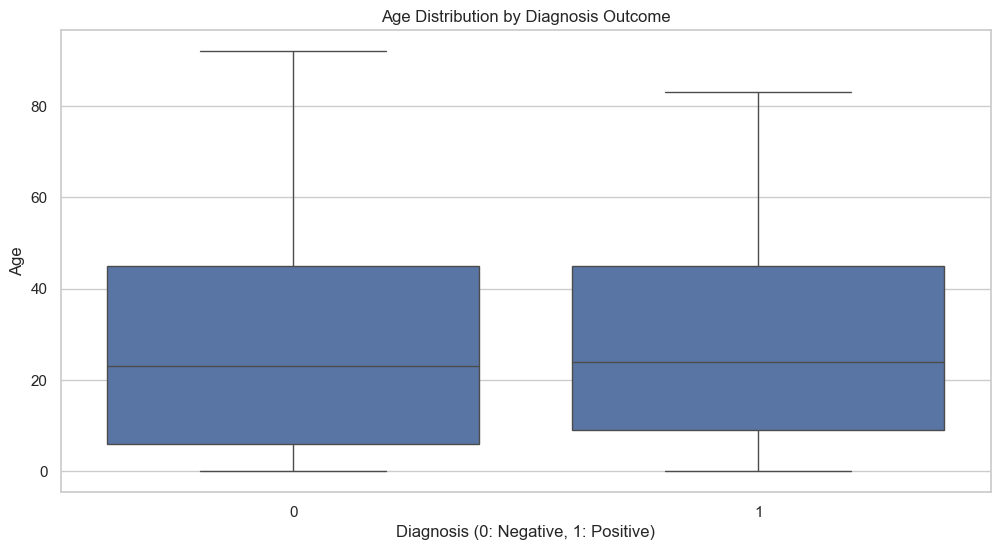

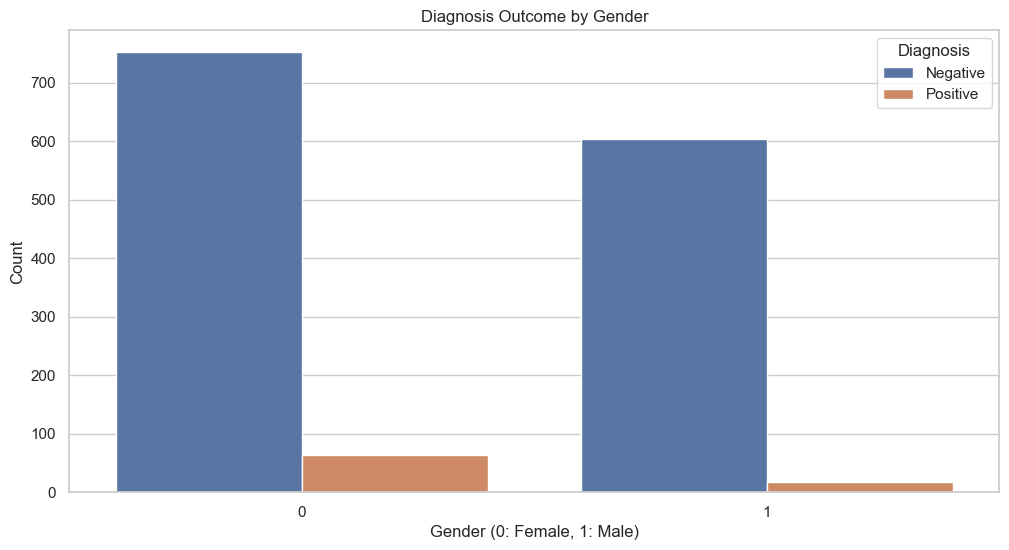

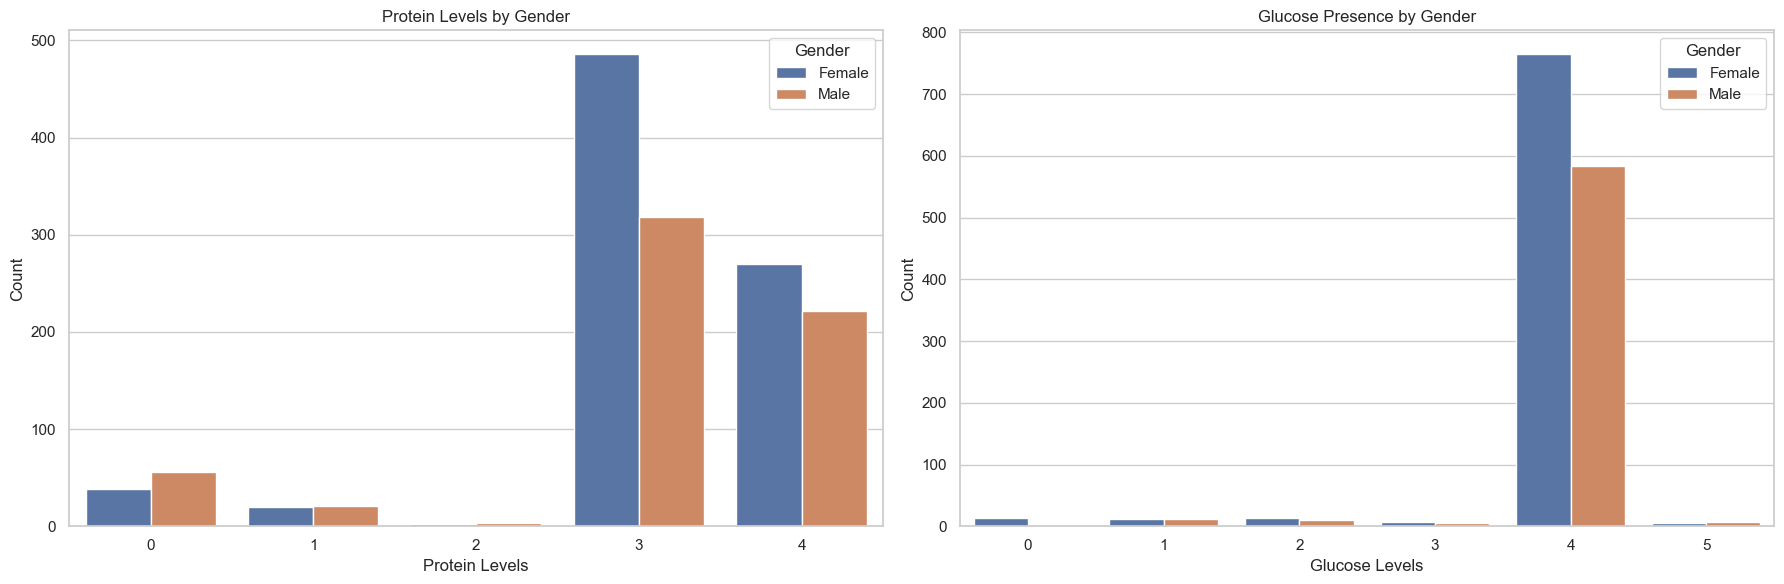

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the visualisation settings for seaborn
sns.set(style="whitegrid")

# Analyzing how age influences diagnosis outcomes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Diagnosis', y='Age', data=data_corrected)
plt.title('Age Distribution by Diagnosis Outcome')
plt.xlabel('Diagnosis (0: Negative, 1: Positive)')
plt.ylabel('Age')
plt.show()

# Analyzing the relationship between gender and diagnosis outcomes
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Diagnosis', data=data_corrected)
plt.title('Diagnosis Outcome by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['Negative', 'Positive'])
plt.show()

# Analyzing how gender correlates with specific parameters like Protein and Glucose
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='Protein', hue='Gender', data=data_corrected, ax=ax[0])
ax[0].set_title('Protein Levels by Gender')
ax[0].set_xlabel('Protein Levels')
ax[0].set_ylabel('Count')
ax[0].legend(title='Gender', labels=['Female', 'Male'])

sns.countplot(x='Glucose', hue='Gender', data=data_corrected, ax=ax[1])
ax[1].set_title('Glucose Presence by Gender')
ax[1].set_xlabel('Glucose Levels')
ax[1].set_ylabel('Count')
ax[1].legend(title='Gender', labels=['Female', 'Male'])

plt.tight_layout()
plt.show()


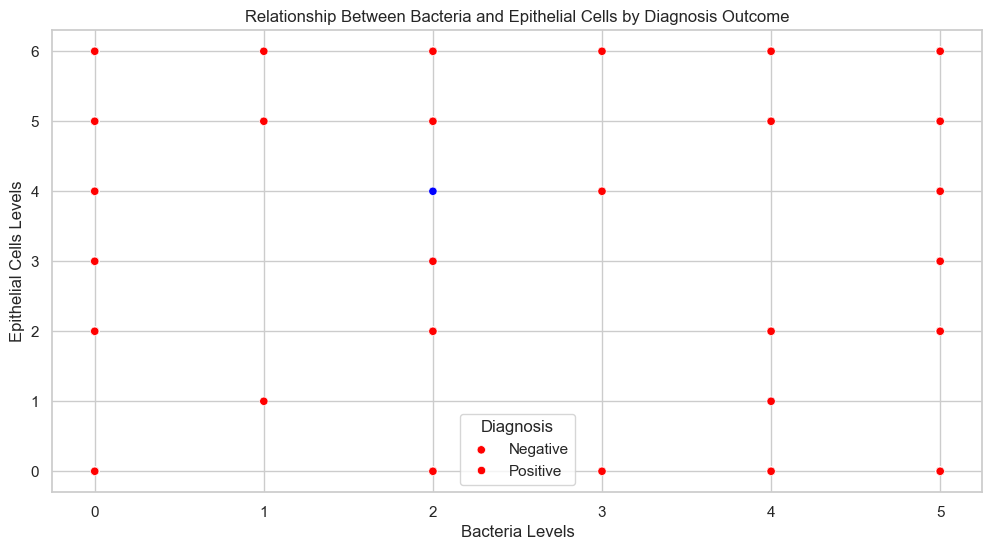

In [14]:
# Create a new figure for visualizations with more distinct colors
plt.figure(figsize=(12, 6))

# Analyzing the relationship between Bacteria, Epithelial Cells, and Diagnosis with distinct colors for clarity
sns.scatterplot(x='Bacteria', y='Epithelial Cells', hue='Diagnosis', data=data_corrected, palette=['red', 'blue'], marker='o')
plt.title('Relationship Between Bacteria and Epithelial Cells by Diagnosis Outcome')
plt.xlabel('Bacteria Levels')
plt.ylabel('Epithelial Cells Levels')
plt.legend(title='Diagnosis', labels=['Negative', 'Positive'])
plt.show()


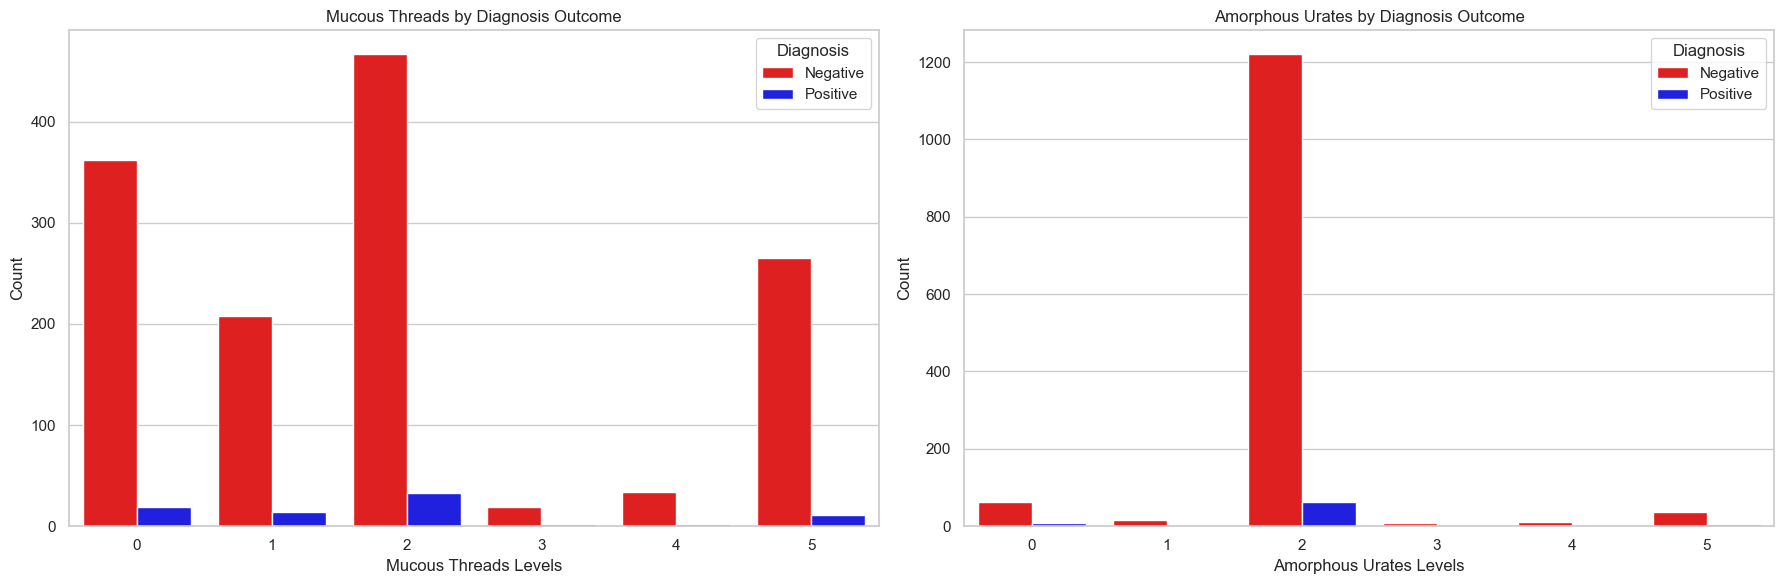

In [15]:
# Create visualizations to explore the relationship of Mucous Threads and Amorphous Urates with Diagnosis outcomes

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Mucous Threads and Diagnosis
sns.countplot(x='Mucous Threads', hue='Diagnosis', data=data_corrected, ax=ax[0], palette=['red', 'blue'])
ax[0].set_title('Mucous Threads by Diagnosis Outcome')
ax[0].set_xlabel('Mucous Threads Levels')
ax[0].set_ylabel('Count')
ax[0].legend(title='Diagnosis', labels=['Negative', 'Positive'])

# Amorphous Urates and Diagnosis
sns.countplot(x='Amorphous Urates', hue='Diagnosis', data=data_corrected, ax=ax[1], palette=['red', 'blue'])
ax[1].set_title('Amorphous Urates by Diagnosis Outcome')
ax[1].set_xlabel('Amorphous Urates Levels')
ax[1].set_ylabel('Count')
ax[1].legend(title='Diagnosis', labels=['Negative', 'Positive'])

plt.tight_layout()
plt.show()
